In [8]:
from lifelines.datasets import load_rossi
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [2]:
rossi = load_rossi()

In [3]:
rossi.head(5)

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


<AxesSubplot:xlabel='timeline'>

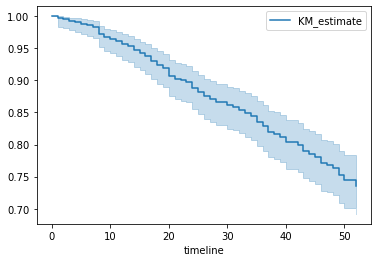

In [6]:
kmf = KaplanMeierFitter()
kmf.fit(rossi['week'],rossi['arrest'])
kmf.plot()

In [9]:
cph = CoxPHFitter()
cph.fit(rossi, duration_col = 'week', event_col = 'arrest')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

In [10]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2022-05-09 13:54:43 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

In [11]:
cph.params_

covariate
fin    -0.379422
age    -0.057438
race    0.313900
wexp   -0.149796
mar    -0.433704
paro   -0.084871
prio    0.091497
Name: coef, dtype: float64

In [14]:
cph.predict_survival_function(rossi).transpose()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,52.0
0,0.997616,0.995230,0.992848,0.990468,0.988085,0.985699,0.983305,0.971402,0.966614,0.964223,...,0.784733,0.774567,0.769460,0.764349,0.754116,0.751552,0.746427,0.733641,0.725969,0.715699
1,0.993695,0.987411,0.981162,0.974941,0.968739,0.962552,0.956370,0.926001,0.913958,0.907978,...,0.526079,0.508214,0.499383,0.490641,0.473429,0.469176,0.460745,0.440128,0.428038,0.412181
2,0.994083,0.988183,0.982314,0.976468,0.970639,0.964820,0.959004,0.930402,0.919043,0.913399,...,0.547334,0.529874,0.521230,0.512664,0.495770,0.491589,0.483296,0.462975,0.451031,0.435335
3,0.999045,0.998089,0.997133,0.996176,0.995216,0.994254,0.993287,0.988460,0.986508,0.985531,...,0.907577,0.902855,0.900469,0.898071,0.893242,0.892026,0.889587,0.883460,0.879752,0.874752
4,0.997626,0.995250,0.992878,0.990507,0.988135,0.985758,0.983374,0.971520,0.966752,0.964370,...,0.785530,0.775396,0.770304,0.765209,0.755007,0.752451,0.747341,0.734592,0.726942,0.716702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.999184,0.998366,0.997548,0.996729,0.995909,0.995085,0.994258,0.990125,0.988453,0.987616,...,0.920433,0.916337,0.914266,0.912184,0.907989,0.906932,0.904812,0.899481,0.896252,0.891896
428,0.997033,0.994065,0.991105,0.988147,0.985189,0.982227,0.979258,0.964523,0.958609,0.955657,...,0.739499,0.727592,0.721624,0.715661,0.703753,0.700776,0.694831,0.680046,0.671203,0.659404
429,0.998866,0.997730,0.996595,0.995458,0.994319,0.993177,0.992030,0.986304,0.983991,0.982833,...,0.891176,0.885670,0.882890,0.880098,0.874478,0.873063,0.870229,0.863112,0.858810,0.853014
430,0.998170,0.996337,0.994507,0.992676,0.990843,0.989006,0.987162,0.977978,0.974277,0.972426,...,0.830240,0.821973,0.817810,0.813638,0.805265,0.803163,0.798956,0.788432,0.782096,0.773592


<AxesSubplot:xlabel='log(HR) (95% CI)'>

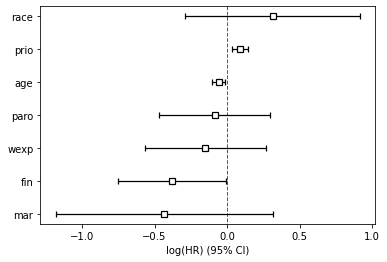

In [17]:
cph.plot()